# Plotting with Matplotlib

In [1]:
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import copy

/Users/philipc/anaconda3/envs/uxarray-build/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
base_path = "../../test/meshfiles/ugrid/outCSne30/"
grid_path = base_path + "outCSne30.ug"
data_path = base_path + "outCSne30_vortex.nc"

uxds = ux.open_dataset(grid_path, data_path)

uxds

<xarray.UxDataset> Size: 43kB
Dimensions:  (n_face: 5400)
Dimensions without coordinates: n_face
Data variables:
    psi      (n_face) float64 43kB ...

## Visualize Grid Topology with `LineCollection`

In [3]:
line_collection = uxds.uxgrid.to_linecollection()

Text(0.5, 1.0, 'Line Collection Plot')

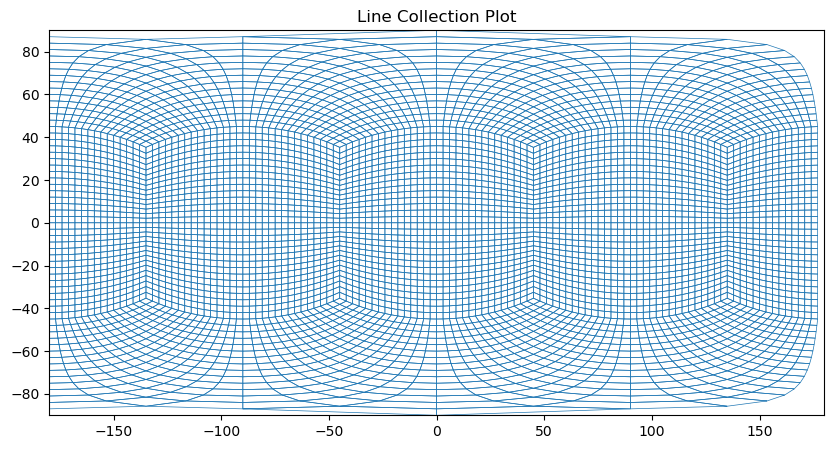

In [29]:
lc = copy.deepcopy(line_collection)

plt.figure(figsize=(10, 5))
lc.set_linewidth(0.5)
ax = plt.axes()
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))
ax.add_collection(lc)
plt.title("Line Collection Plot")

Text(0.5, 1.0, 'Line Collection Plot (Robinson Projection with Coastlines)')

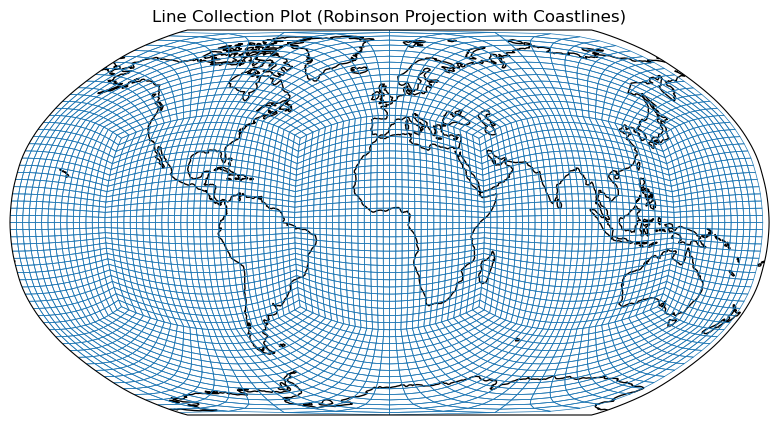

In [77]:
lc = copy.deepcopy(line_collection)

plt.figure(figsize=(10, 5))
lc.set_transform(ccrs.PlateCarree())
lc.set_linewidth(0.5)
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.add_collection(lc)
plt.title("Line Collection Plot (Robinson Projection with Coastlines)")

## Visualize Data with `PolyCollection`

In [14]:
poly_collection = uxds["psi"].to_polycollection()

Text(0.5, 1.0, 'Poly Collection Plot')

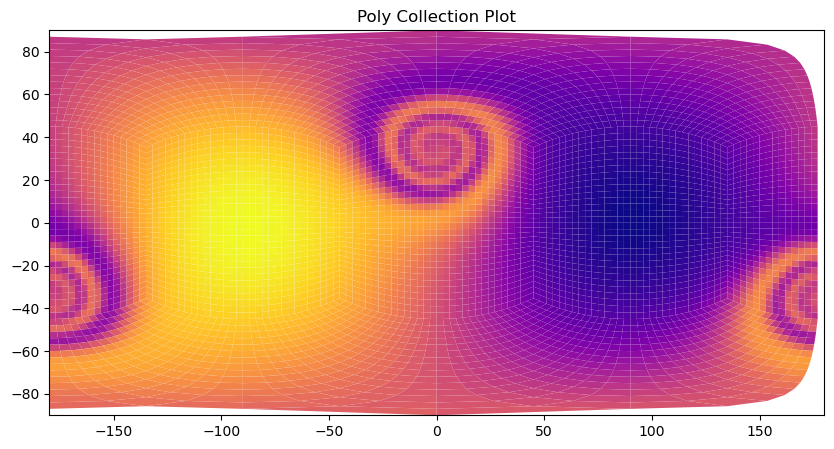

In [78]:
pc = copy.deepcopy(poly_collection)

plt.figure(figsize=(10, 5))
pc.set_linewidth(0.5)
pc.set_cmap("plasma")
ax = plt.axes()
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))
ax.add_collection(pc)
plt.title("Poly Collection Plot")

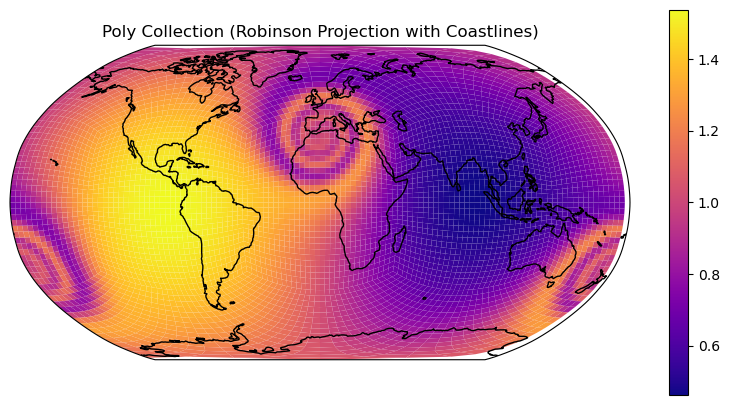

In [32]:
pc = copy.deepcopy(poly_collection)

pc.set_transform(ccrs.PlateCarree())
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
pc.set_cmap("plasma")
ax.add_collection(pc)
ax.set_title("Poly Collection (Robinson Projection with Coastlines)")
ax.set_global()
plt.colorbar(pc)

## Handling Periodic Elements

### Global Data

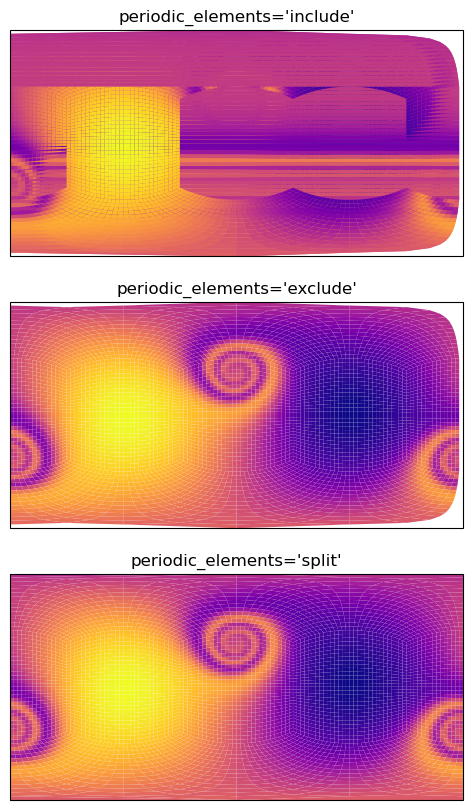

In [68]:
methods = ["include", "exclude", "split"]
poly_collections = [
    uxds["psi"].to_polycollection(periodic_elements=method) for method in methods
]


fig, axes = plt.subplots(
    nrows=3, figsize=(20, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)

for ax, pc, method in zip(axes, poly_collections, methods):
    pc.set_linewidth(0)
    pc.set_cmap("plasma")
    ax.set_xlim((-180, 180))
    ax.set_ylim((-90, 90))
    ax.add_collection(pc)
    ax.set_title(f"periodic_elements='{method}'")

### Regional Data

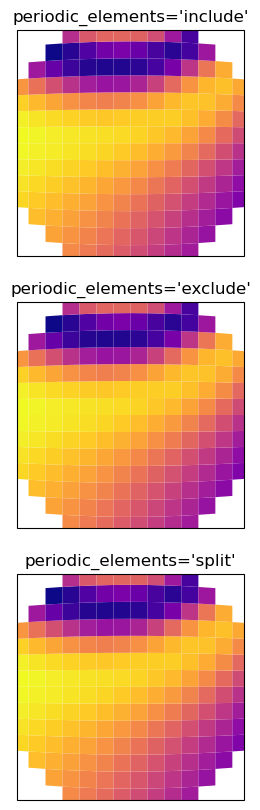

In [76]:
methods = ["include", "exclude", "split"]
poly_collections = [
    uxds["psi"]
    .subset.bounding_circle((0, 0), 20)
    .to_polycollection(periodic_elements=method)
    for method in methods
]


fig, axes = plt.subplots(
    nrows=3, figsize=(10, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)

for ax, pc, method in zip(axes, poly_collections, methods):
    pc.set_linewidth(0)
    pc.set_cmap("plasma")
    ax.set_xlim((-20, 20))
    ax.set_ylim((-20, 20))
    ax.add_collection(pc)
    ax.set_title(f"periodic_elements='{method}'")